In [132]:
import numpy as np
import pandas as pd
import math
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from glob import glob
from astropy.table import Table

plt.rcParams['figure.dpi'] = 120

mpl.rcParams['figure.figsize'] = 8, 6
mpl.rcParams.update({'font.size':12})

In [3]:
hdulist = fits.open('Landolt/2012-10-12/kp1622749.fits.fz')
print([hdulist.info()])
hdu = hdulist[1]
hdr = hdu.header
imdata = hdu.data
print([hdr])

Filename: Landolt/2012-10-12/kp1622749.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    107   (1352, 2000)   int32   
[None]
[SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1352 / length of data axis 1                          
NAXIS2  =                 2000 / length of data axis 2                          
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplem

### Reading FITS keywords from all files in a subdirectory

In [4]:
working_dir_path = '.'
globpath = os.path.join(working_dir_path, 'Landolt/2012-10-12/kp*.fits.fz')
filelist = glob(globpath)

#f = open("Landolt_list.txt", "w")

# This next part prints a list of important keywords to see what kinds of exposures we have.
# You can direct output to a file also, which can be inspected later with Excel or similar.
for filename in filelist: 
    hdulist = fits.open(filename)
    hdr = hdulist[1].header
    imtyp = hdr['IMGTYPE']
    fname = hdr['SB_NAME']
    oname = hdr['OBJECT']
    exptime = hdr['OBSTIME']
    phot_filter = hdr['FILTNAME']
    airmass = hdr['AIRMASS']
    ra = hdr['RA']
    dec = hdr['DEC']
    #print(fname,imtyp,oname,exptime,phot_filter, file=f)
    print(fname,imtyp,oname,exptime,phot_filter,ra,dec)

#f.close()

kp1622399.fits zero zero 0.0 V 13:35:44.62 30:32:56.4
kp1622400.fits zero zero 0.0 V 14:08:26.73 30:32:56.4
kp1622402.fits zero zero 0.0 V 14:10:34.33 30:32:56.4
kp1622412.fits zero zero 0.0 V 16:23:56.91 -28:15:00.0
kp1622413.fits zero zero 0.0 V 16:24:37.14 -28:15:00.0
kp1622414.fits zero zero 0.0 V 16:25:17.25 -28:15:00.0
kp1622416.fits zero zero 0.0 V 16:25:58.36 -28:15:00.0
kp1622417.fits zero zero 0.0 V 16:26:38.47 -28:15:00.0
kp1622419.fits zero zero 0.0 V 16:27:19.71 -28:15:00.0
kp1622420.fits zero zero 0.0 V 16:27:59.82 -28:15:00.0
kp1622421.fits zero zero 0.0 V 16:28:40.93 -28:15:00.0
kp1622422.fits zero zero 0.0 V 16:29:22.17 -28:15:00.0
kp1622424.fits zero zero 0.0 V 16:30:02.40 -28:15:00.0
kp1622427.fits flat U Dome Flat 13.0 U-CuSO4 16:34:08.58 -28:15:00.0
kp1622430.fits flat U Dome Flat 13.0 U-CuSO4 16:35:01.60 -28:15:00.0
kp1622431.fits flat U Dome Flat 13.0 U-CuSO4 16:35:56.00 -28:15:00.0
kp1622433.fits flat U Dome Flat 13.0 U-CuSO4 16:36:50.02 -28:15:00.0
kp1622434.fi

kp1622738.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622739.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622740.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622741.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622743.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622744.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622746.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622747.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622748.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622749.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622751.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622754.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622755.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622756.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622757.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622759.fits object Feige108 30.0 V 23:16:12.00 -1:50:35.0
kp1622761.fits object Fe

### Image is rotated 270 degrees clockwise
Can correct for this by taking a transpose of the array and switching the origin to be upper left hand corner rather than lower.

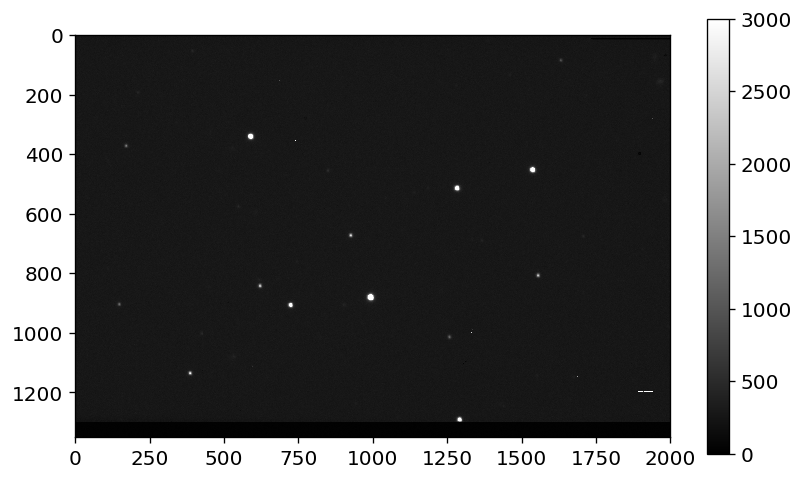

In [8]:
hdulist = fits.open('Landolt/Science Frames/CAlkp1622817.fits.fz')
hdu = hdulist[1]
hdr = hdu.header
imdata=hdu.data
T_imdata = imdata.transpose()
plt.imshow(T_imdata, origin='upper', vmin=0, vmax=3000, cmap='gray')
plt.colorbar(shrink=0.8)

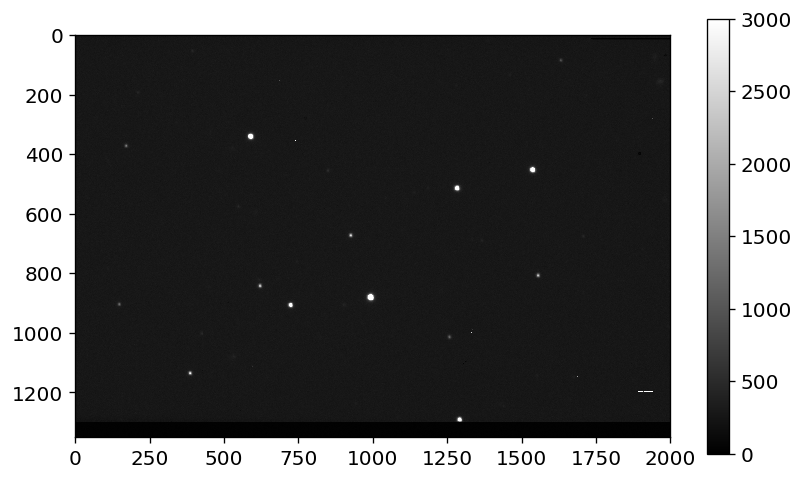

In [12]:
hdulist = fits.open('Landolt/Science Frames/CALkp1622817.fits.fz')
hdu = hdulist[1]
hdr = hdu.header
imdata=hdu.data
T_imdata = imdata.transpose()
plt.imshow(T_imdata, origin='upper', vmin=0, vmax=3000, cmap='gray')
plt.colorbar(shrink=0.8)

### Data values in the overscan region

In [6]:
[nr,nc]=imdata.shape
col1320=imdata[:,1320]
print(col1320.size)
rows = np.arange(nr)
plt.plot(rows,col1320,'b-')

2000


In [7]:
working_dir_path = '.'
globpath = os.path.join(working_dir_path, 'Landolt/NGC 7031 All/kp*.fits.fz')
filelist = glob(globpath)

#f = open("Landolt_list.txt", "w")

# This next part prints a list of important keywords to see what kinds of exposures we have.
# You can direct output to a file also, which can be inspected later with Excel or similar.
NGC7031 = []
for filename in filelist: 
    hdulist = fits.open(filename)
    hdr = hdulist[1].header
    fname = hdr['SB_NAME']
    end = '.fz'
    fdir = 'Landolt/NGC 7031 All/' + fname + end
    NGC7031.append(fdir)
    exptime = hdr['OBSTIME']
    #print(fname,imtyp,oname,exptime,phot_filter, file=f)
    print(fname,exptime)

#f.close()


kp1622598.fits 25.0
kp1622599.fits 250.0
kp1622601.fits 500.0
kp1622603.fits 100.0
kp1622604.fits 250.0
kp1622607.fits 500.0
kp1622608.fits 100.0
kp1622609.fits 60.0
kp1622612.fits 100.0
kp1622613.fits 100.0
kp1622615.fits 20.0
kp1622618.fits 20.0
kp1622619.fits 20.0
kp1622621.fits 20.0
kp1622623.fits 100.0
kp1622626.fits 100.0
kp1622629.fits 60.0
kp1622630.fits 20.0
kp1622633.fits 250.0
kp1622636.fits 250.0
kp1622637.fits 250.0
kp1622640.fits 500.0
kp1622641.fits 100.0
kp1622644.fits 250.0
kp1622645.fits 500.0
kp1622648.fits 100.0
kp1622649.fits 250.0
kp1622652.fits 500.0


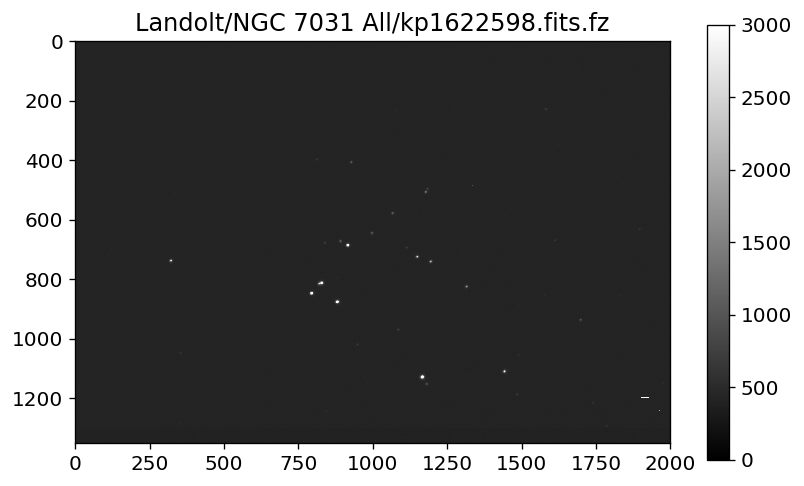

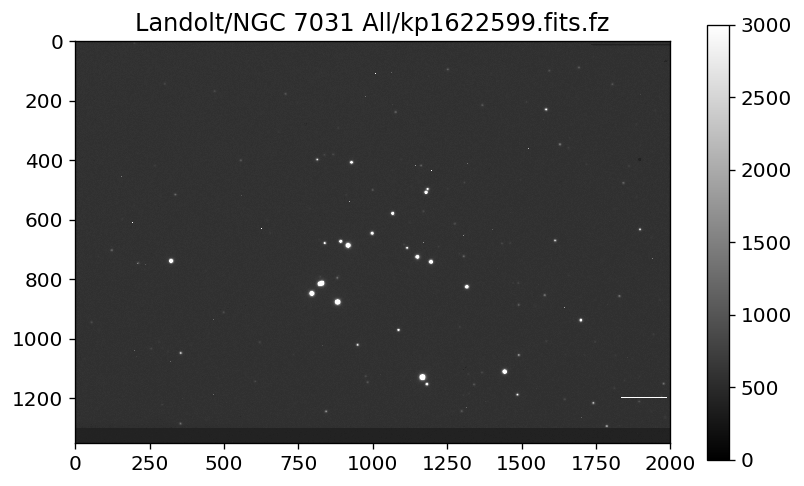

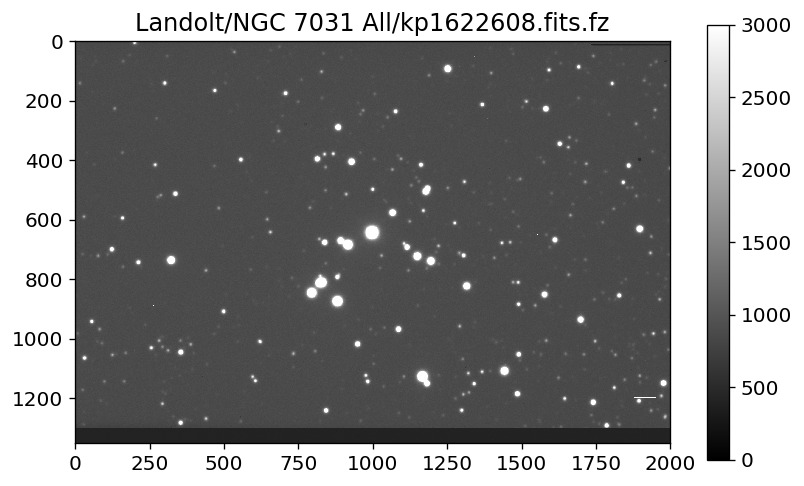

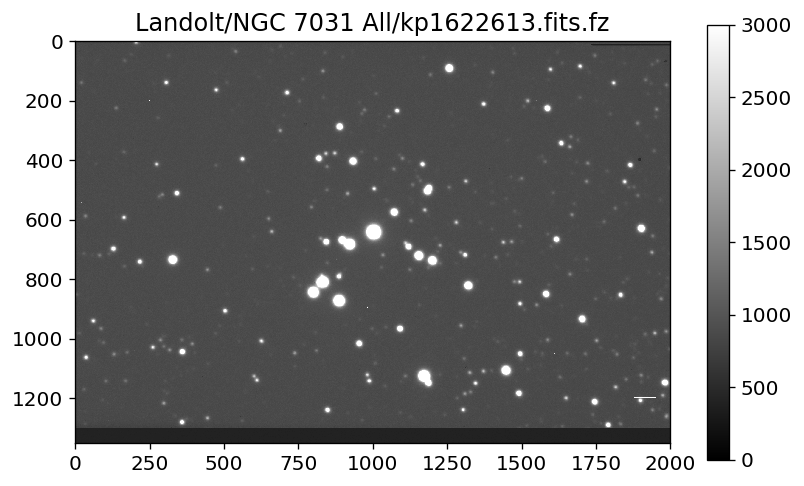

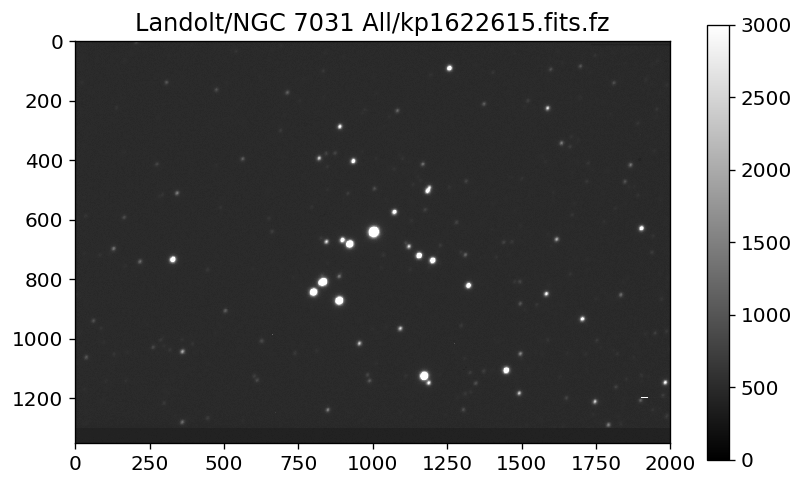

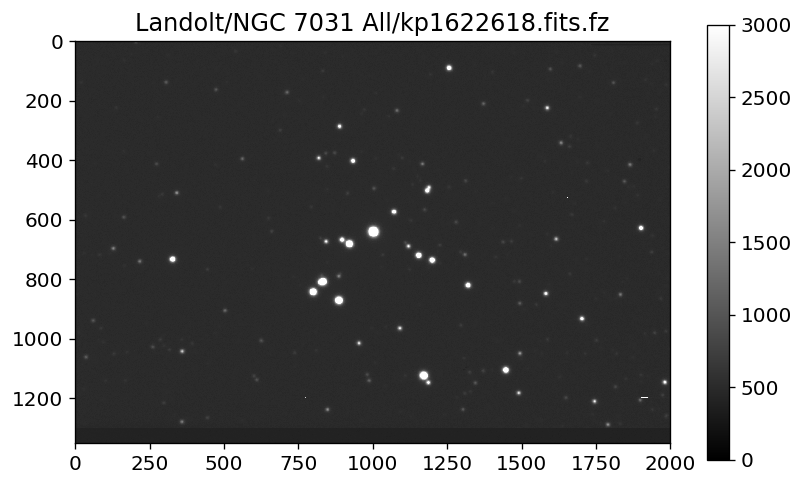

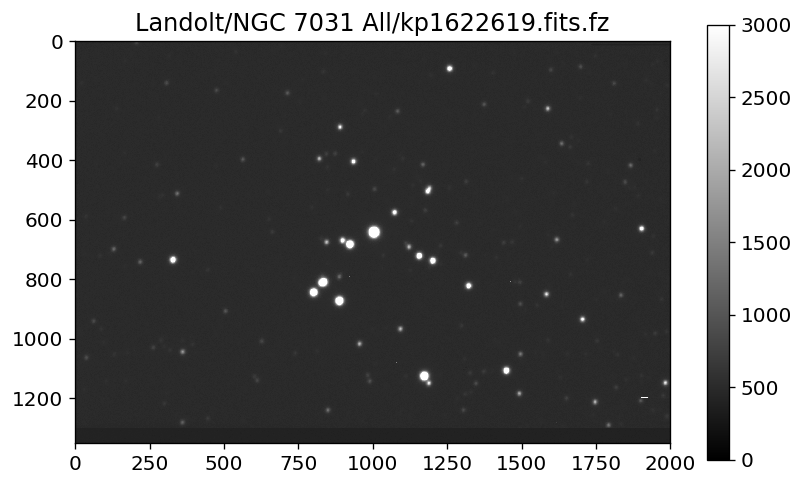

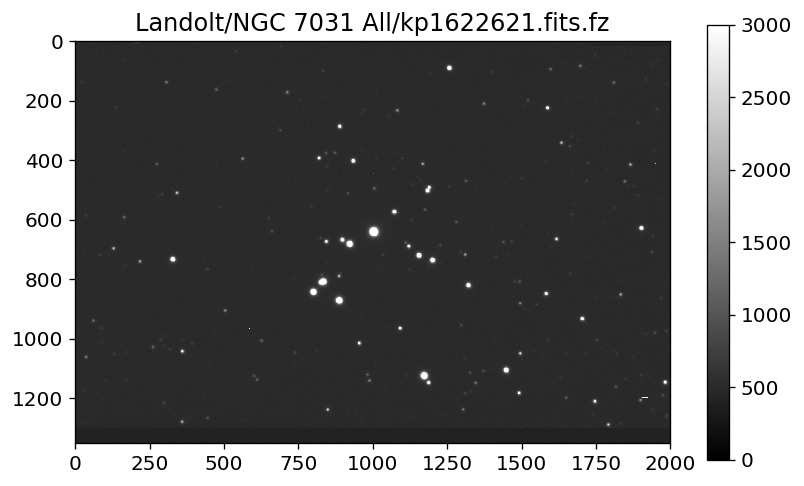

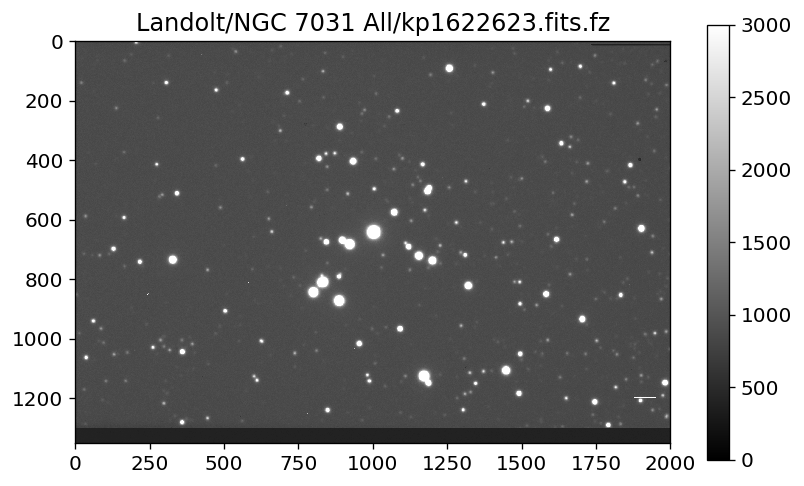

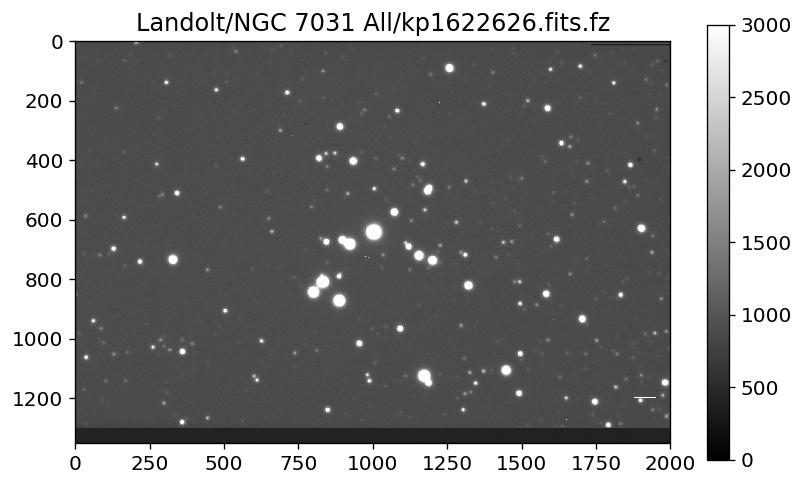

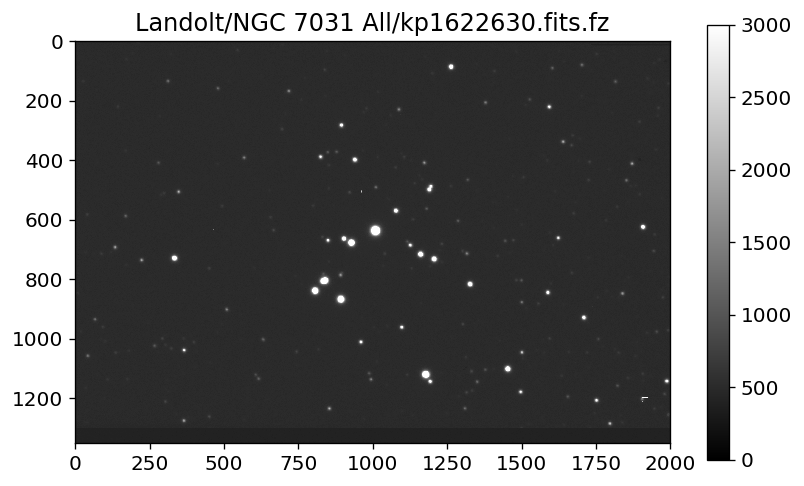

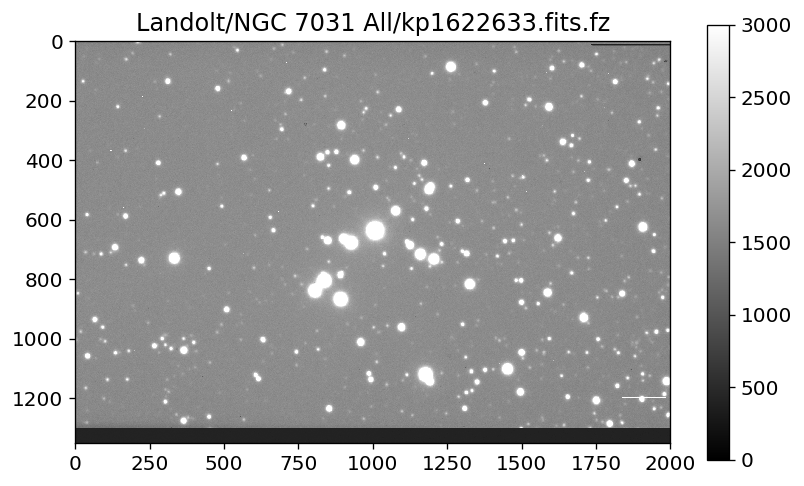

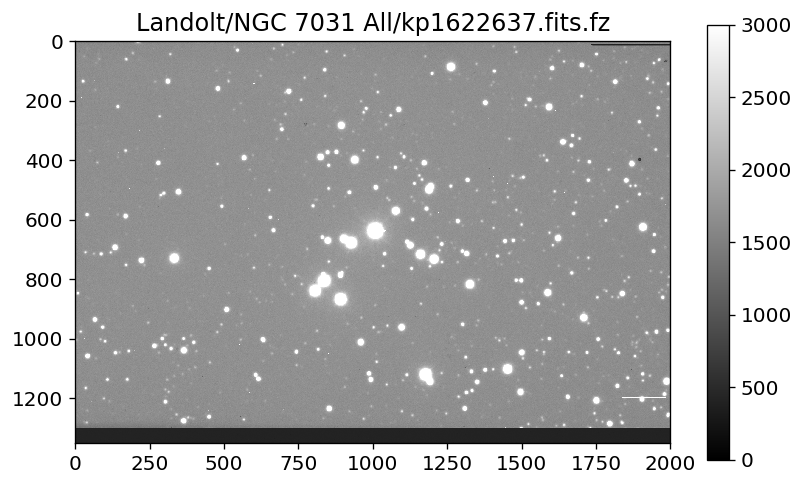

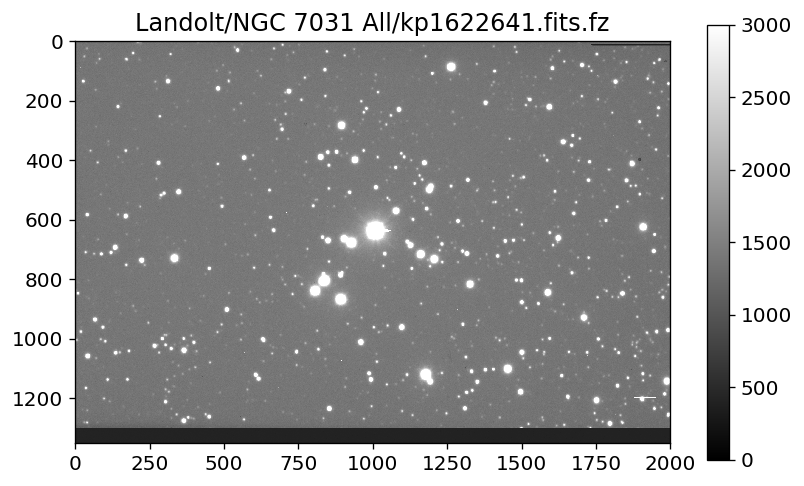

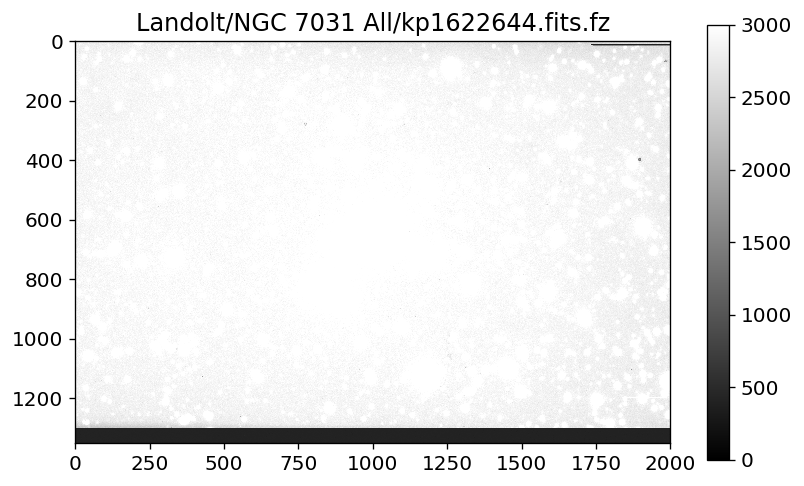

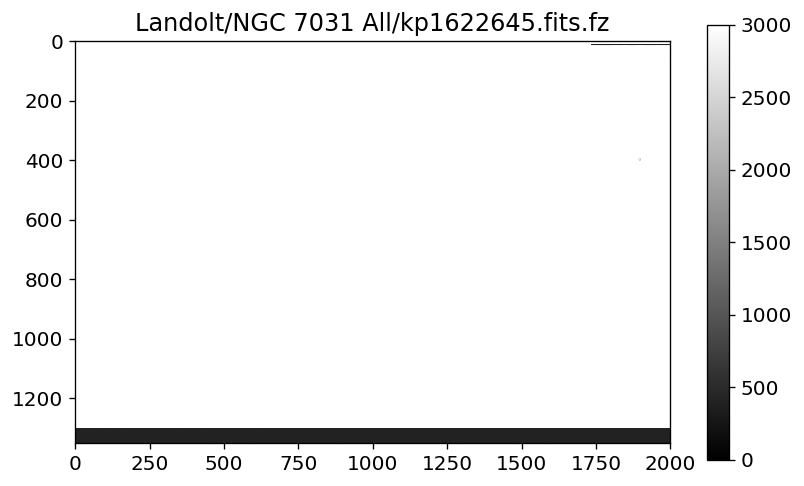

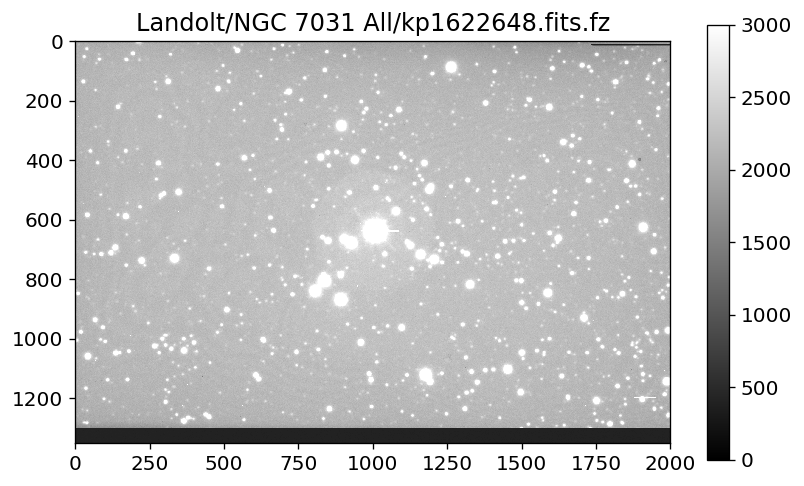

In [24]:
for filename in NGC7031:
    hdulist = fits.open(filename)
    hdu = hdulist[1]
    hdr = hdu.header
    imdata=hdu.data
    T_imdata = imdata.transpose()
    plt.imshow(T_imdata, origin='upper', vmin=0, vmax=3000, cmap='gray')
    plt.colorbar(shrink=0.8)
    plt.title(filename)
    plt.show()

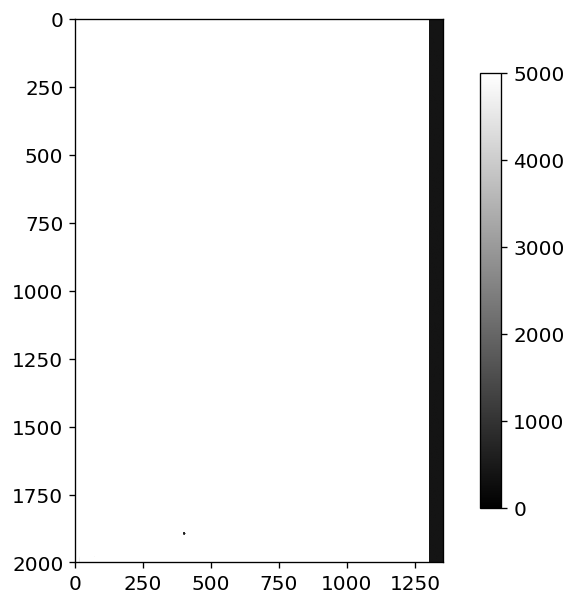

In [9]:
hdulist = fits.open('Landolt/2012-10-12/kp1622435.fits.fz')
hdu = hdulist[1]
hdr = hdu.header
imdata=hdu.data
plt.imshow(imdata, origin='upper', vmin=0, vmax=5000, cmap='gray')
plt.colorbar(shrink=0.8)

In [10]:
hdulist = fits.open('Landolt/NGC 7031 All/kp1622598.fits.fz')
hdu = hdulist[1]
hdr = hdu.header
imdata=hdu.data
T_imdata = imdata.transpose()
plt.imshow(imdata, origin='upper', vmin=0, vmax=3000, cmap='gray')
plt.colorbar(shrink=0.8)

In [5]:
def cal(color):
    working_dir_path = '.'
    if color == 'B':
        globpath = os.path.join(working_dir_path, 'Landolt/Science Frames/kp*.fits.fz')
        filelist = glob(globpath)
        for filename in filelist:
            hdulist = fits.open(filename)
            mbiaslist = fits.open('Landolt/Zeros/Lamasterbias.fits')
            bflatlist = fits.open('Landolt/B Flats/masterbflats4real.fits')
            hdu = hdulist[1]
            mbias = mbiaslist[1]
            bflat = bflatlist[1]
            hdr = hdu.header
            star_name = hdr['SB_NAME']
            mbiasr = mbias.header
            bflatr = bflat.header
            imdata = hdu.data
            dsum = mbias.data
            fsum = bflat.data
            fsumn = (fsum - dsum) / np.median(fsum - dsum)
            imdata_d = imdata - dsum
            imdata_f = imdata_d / fsumn
            hdu.data = imdata_f
            hdr.set('CAL' + star_name,'I did it!')
            hdr['COMMENT']='Chance is a lone wolf.'
            hdu.writeto('Landolt/Science Frames/CAL' + star_name + '.fz')
    elif color == 'V':
        globpath = os.path.join(working_dir_path, 'Landolt/Science Frames/kp*.fits.fz')
        filelist = glob(globpath)
        for filename in filelist:
            hdulist = fits.open(filename)
            mbiaslist = fits.open('Landolt/Zeros/Lamasterbias.fits')
            vflatlist = fits.open('Landolt/V Flats/mastervflats4real.fits')
            hdu = hdulist[1]
            mbias = mbiaslist[1]
            vflat = vflatlist[1]
            hdr = hdu.header
            star_name = hdr['SB_NAME']
            mbiasr = mbias.header
            vflatr = vflat.header
            imdata = hdu.data
            dsum = mbias.data
            fsum = vflat.data
            fsumn = (fsum - dsum) / np.median(fsum - dsum)
            imdata_d = imdata - dsum
            imdata_f = imdata_d / fsumn
            hdu.data = imdata_f
            hdr.set('CAL' + star_name,'I did it!')
            hdr['COMMENT']='Chance is a lone wolf.'
            hdu.writeto('Landolt/Science Frames/CAL' + star_name +'.fz')

In [9]:
#cal('V')
#cal('B')

OSError: File 'Landolt/Science Frames/CALkp1622817.fits.fz' already exists.

In [3]:
xls = pd.ExcelFile('Project 3.xlsx')
df1 = pd.read_excel(xls, 'PG0231+051')
df2 = pd.read_excel(xls, 'Kp603 B')
df3 = pd.read_excel(xls, 'KP604 B')
df4 = pd.read_excel(xls, 'KP612 Visual')
df5 = pd.read_excel(xls, 'KP613 Visual')
df6 = pd.read_excel(xls, 'KP615 Visual')
df7 = pd.read_excel(xls, 'KP630 Visual')
df8 = pd.read_excel(xls, 'KP633 Visual')
df9 = pd.read_excel(xls, 'KP636 Visual')

In [4]:
all_null = np.array([1,4,5,9,10,14,15,18,20,24,25,26,30,31,33,34,35,36,37,38])
less_avg5 = np.array([1, 15, 24])
less_avg4 = np.array([18, 20, 30, 31, 34])

In [5]:
def flx(df):
    i = 0
    j = 0
    temp = np.array([])
    while i < df['Flux'].size:
        if i == all_null[j]:
            tempval = 0
            temp = np.append(temp, tempval)
            if j < all_null.size - 1:
                j+=1
            else:
                j = 0
        else:
            temp = np.append(temp, df['Flux'][i])
        i+=1
    return temp

In [ ]:
def flxerr(df):
    i = 0
    j = 0
    temp = np.array([])
    while i < df['Flux'].size:
        if i == all_null[j]:
            tempval = 0
            temp = np.append(temp, tempval)
            if j < all_null.size - 1:
                j+=1
            else:
                j = 0
        else:
            temp = np.append(temp, df['Flux'][i])
        i+=1
    return temp

In [6]:
newb1 = flx(df2)
newb2 = flx(df3)
newv1 = flx(df4)
newv2 = flx(df5)
newv3 = flx(df6)
newv4 = flx(df7)
newv5 = flx(df8)
newv6 = flx(df9)

In [47]:
def flx45(df, num):
    i = 0
    j = 0
    temp = np.array([])
    if num == 4:
        while i < df['Flux'].size:
            if i == less_avg4[j]:
                temp = np.append(temp, df['Flux'][i])
                if j < less_avg4.size - 1:
                    j+=1
                else:
                    j = 0
            i+=1
    elif num == 5:
        while i < df['Flux'].size:
            if i == less_avg5[j]:
                temp = np.append(temp, df['Flux'][i])
                if j < less_avg5.size - 1:
                    j+=1
                else:
                    j = 0
            i+=1
    return temp

In [48]:
newb14, newb15 = flx45(df2, 4), flx45(df2, 5)
newb24, newb25 = flx45(df3, 4), flx45(df3, 5)
newv14, newv15 = flx45(df4, 4), flx45(df4, 5)
newv24, newv25 = flx45(df5, 4), flx45(df5, 5)
newv34, newv35 = flx45(df6, 4), flx45(df6, 5)
newv44, newv45 = flx45(df7, 4), flx45(df7, 5)
newv54, newv55 = flx45(df8, 4), flx45(df8, 5)
newv64, newv65 = flx45(df9, 4), flx45(df9, 5)
print(newb14, newb15)

[  105.758 89135.      448.291   141.733  4324.01 ] [308.105 163.409 305.734]


In [49]:
flux4b = (newb14 + newb24) / 2
flux5b = (newb15 + newb25) / 2
flux4v = (newv14 + newv24 + newv34 + newv44 + newv54 + newv64) / 6
flux5v = (newv15 + newv25 + newv35 + newv45 + newv55 + newv65) / 6
print(flux4b, flux5b, flux4v, flux5v)

[  110.759  78456.9      445.2275   148.3041  4312.785 ] [305.2517 157.3501 310.145 ] [   994.22216667 540209.83333333   3670.23933333    757.95333333
  14427.3       ] [1096.329       861.351      1466.33366667]


In [129]:
fluxb = (newb1 + newb2) / 2
fluxberr = np.sqrt(fluxb)
fluxv = (newv1 + newv2 + newv3 + newv4 + newv5 + newv6) / 6
fluxverr = np.sqrt(fluxv)
print('Mean:', np.mean(fluxv), 'STD:', np.std(fluxv))
#print(fluxb)
print(fluxberr)
#print(fluxv)
print(fluxverr)

Mean: 15459.658124999998 STD: 40110.129196199545
[ 22.15234751   0.          22.20581005  24.32313713   0.
   0.         148.98644234  35.59922752  35.71673277   0.
   0.          22.31246289 169.395484   176.16148841   0.
   0.         114.63302317  75.40835497   0.          28.54694379
   0.         106.27492649  69.82771656  45.28401484   0.
   0.           0.          43.03871513 278.37780084  22.93455908
   0.           0.          75.07646102   0.           0.
   0.           0.           0.           0.          34.40520309]
[ 42.38885074   0.          43.8208455   46.42119487   0.
   0.         232.13544897  69.71861301  75.08080092   0.
   0.          45.74521651 271.79305853 283.46060867   0.
   0.         189.4143606  127.37461155   0.          56.0526895
   0.         185.52681747 124.23133663 150.12974944   0.
   0.           0.          84.73649352 484.75371754  45.70922773
   0.           0.         124.35419843   0.           0.
   0.           0.           0.          

In [72]:
def allflx(clr):
    newb = np.array([])
    newv = np.array([])
    i = 0
    j = 0
    while i < fluxb.size:
        if fluxb[i] == 0 and i == less_avg4[j]:
            print(flux4b[j], flux4v[j])
            if j < less_avg4.size - 1:
                j+=1
            else:
                j = 0
        i+=1

In [73]:
allflx()

110.759 994.2221666666668
78456.9 540209.8333333334
445.22749999999996 3670.239333333333
148.3041 757.9533333333334
4312.785 14427.300000000001


In [10]:
def func(var):
    if var == 'V':
        Mag = np.array([])
        for i in df1['Flux']:
            mag = -2.5*math.log10(i)
            Mag = np.append(Mag, mag)
        return Mag
    elif var == 'B':
        Mag = np.array([])
        temp = np.array([4296.47,37800.00,3210.00,16100.00,8470.00,14800.00])
        for i in temp:
            mag = -2.5*math.log10(i)
            Mag = np.append(Mag, mag)
        return Mag

In [142]:
test = func('V')
landoltv = np.array([16.11,12.77,14.74,13.7,14.03,13.8])
pizza = np.subtract(landoltv, test)
landoltb_v = np.array([-0.329,0.71,1.448,0.671,1.088,0.677])
landoltb = landoltb_v + landoltv
corrv = np.mean(pizza)
print(corrv)
test2 = func('B')
pizza2 = np.subtract(landoltb, test2)
corrb = np.mean(pizza2)
print(corrb)
print(landoltb_v)

25.183584772031622
24.911699840703232
[-0.329  0.71   1.448  0.671  1.088  0.677]


In [12]:
def mags(var):
    if var == 'V':
        flux = fluxv
        all_mags = np.array([])
        i = 0
        while i < flux.size:
            if flux[i] != 0:
                MAG = -2.5*math.log10(flux[i]) + corrv
                all_mags = np.append(all_mags, MAG)
            else:
                all_mags = np.append(all_mags, 0)
            i+=1
        return all_mags
    elif var == 'B':
        flux = fluxb
        all_mags = np.array([])
        i = 0
        while i < flux.size:
            if flux[i] != 0:
                MAG = -2.5*math.log10(flux[i]) + corrb
                all_mags = np.append(all_mags, MAG)
            else:
                all_mags = np.append(all_mags, 0)
            i+=1
        return all_mags

In [13]:
V = mags('V')
B = mags('B')
print(V)
print(B)

[17.04732656  0.         16.97518101 16.8500032   0.          0.
 13.35487744 15.96684108 15.80594029  0.          0.         16.88185633
 13.01239297 12.9211212   0.          0.         13.79652026 14.65817041
  0.         16.44060249  0.         13.8415513  14.71242898 14.30125097
  0.          0.          0.         15.54323233 11.75597903 16.88356535
  0.          0.         14.71028251  0.          0.          0.
  0.          0.          0.         16.06041135]
[18.18460106  0.         18.17936674 17.9816019   0.          0.
 14.04596609 17.15449697 17.14734122  0.          0.         18.16896229
 13.7671907  13.68214499  0.          0.         14.61515111 15.52460251
  0.         17.63390174  0.         14.77954577 15.69156064 16.63197522
  0.          0.          0.         16.74240335 12.68852684 18.10924787
  0.          0.         15.53418088  0.          0.          0.
  0.          0.          0.         17.22857921]


In [121]:
B_V = np.subtract(B, V)
i = 0
Berr = np.array([])
Verr = np.array([])
while i < fluxv.size:
    if fluxv[i] == 0:
        Verr = np.append(Verr, 0)
        Berr = np.append(Berr, 0)
    else:
        Verr = np.append(Verr, fluxverr[i] / fluxv[i])
        Berr = np.append(Berr, fluxberr[i] / fluxb[i])
    i+=1
print(Verr) 
print(Berr)
B_Verr = (Verr**2 + Berr*2)
print(B_Verr)

[0.02359111 0.         0.02282019 0.02154188 0.         0.
 0.00430783 0.01434337 0.01331898 0.         0.         0.02186021
 0.00367927 0.00352783 0.         0.         0.00527943 0.00785086
 0.         0.01784036 0.         0.00539006 0.0080495  0.00666091
 0.         0.         0.         0.01180129 0.0020629  0.02187742
 0.         0.         0.00804155 0.         0.         0.
 0.         0.         0.         0.01497495]
[0.04514194 0.         0.04503326 0.04111312 0.         0.
 0.00671202 0.0280905  0.02799808 0.         0.         0.044818
 0.00590335 0.00567661 0.         0.         0.00872349 0.01326113
 0.         0.03503002 0.         0.00940956 0.01432096 0.02208285
 0.         0.         0.         0.02323489 0.00359224 0.04360232
 0.         0.         0.01331975 0.         0.         0.
 0.         0.         0.         0.02906537]
[0.09084043 0.         0.09058728 0.08269029 0.         0.
 0.0134426  0.05638673 0.05617356 0.         0.         0.09011387
 0.01182023 

[0, 3, 17.5, 11]

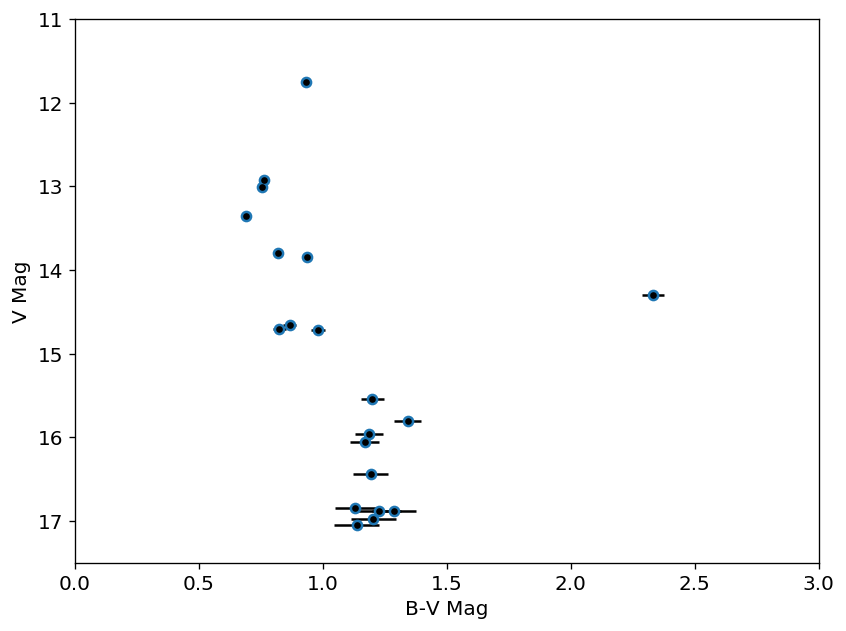

In [131]:
plt.plot(B_V, V, 'o')
plt.ylabel('V Mag')
plt.xlabel('B-V Mag')
plt.errorbar(B_V, V, Verr, B_Verr, fmt = 'k.')
plt.axis([0, 3, 17.5, 11])

In [135]:
t = Table([B, Berr, V, Verr, B_V, B_Verr], names=('B mag', 'B mag err', 'V mag','V mag err', 'B-V mag', 'B-V mag err'))

In [140]:
t.show_in_notebook()

AttributeError: 'Table' object has no attribute 'to_csv'